In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
prosper_df = pd.read_csv('prosperLoanData.csv')

In [3]:
print(prosper_df.shape)
print(prosper_df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

### important variables planned to be used in exploratory analysis

- CreditGrade (for only pre 2009 period. Assigned credit grade before listing went live)
- Term (length of loan)
- LoanStatus (imp: Defaulted, chargedoff, PastDue, Current)
- Borrower Rate (since there are some missing values for APR, we proceed to analyze borrower rate)
- ListingCreationDate: Date of listing creation (used for filtering listings,(pre and post july, 2009)

#### Post 2009 period
- EstimatedReturn: estimated return for each loan. (estimated yield minus estimated loss)
- prosperRating (alpha and numeric) Rating given by prosper for each loan. Range from 1 to 7, 0 being for N/A cases. alpha ranges through HR, E, D, C, B, A, AA
- ProsperScore: Risk score ranging from 1 to 10. 10 being best or lowest risk score

#### All period
- ListingCategory: Category selected by borrower for type of loan: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState: state of the borrower
- Occupation: Selected by borrower at the time of listing.
- EmploymentStatus: Selected by borrower at the time of listing.
- EmploymentStatusDuration: Duration of said employment
- IsBorrowerHomeowner: If borrower has a mortgage on a home has provided documents for possessing a home.


## Assess

In [4]:
prosper_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

#### Quality issues
- CreditGrade is not categorical ordinal with order. [AA,A, B, C, D, E, HR, NC]
- ListingCreationDate is not in date format

## Clean
### Format of listingCreationDate
#### Define
- check what date format the values are in
- Convert into date format

#### Code

In [5]:
prosper_df.ListingCreationDate.sample(5)

35285    2007-10-28 23:35:00.893000000
7975     2012-10-08 05:58:45.670000000
20693    2012-04-16 07:08:54.690000000
71164    2007-06-13 15:01:08.730000000
23884    2013-12-17 07:26:45.467000000
Name: ListingCreationDate, dtype: object

In [6]:
prosper_clean_df = prosper_df.copy()
prosper_clean_df.ListingCreationDate = pd.to_datetime(prosper_df.ListingCreationDate)

### Test

In [7]:
prosper_clean_df.iloc[:,:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
ListingKey             113937 non-null object
ListingNumber          113937 non-null int64
ListingCreationDate    113937 non-null datetime64[ns]
CreditGrade            28953 non-null object
Term                   113937 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.3+ MB


# Univariate Analysis
#### CreditGrade

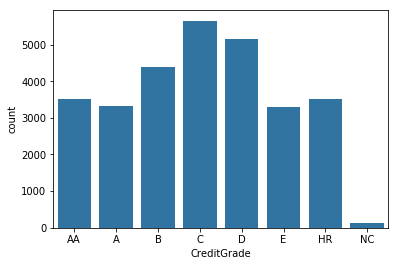

In [8]:
cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x = 'CreditGrade',color = base_color,order = cat_order)

There is a fairly normal distribution in the above. we must remember one thing though, that the data is only for pre 2009 loans.
#### Term

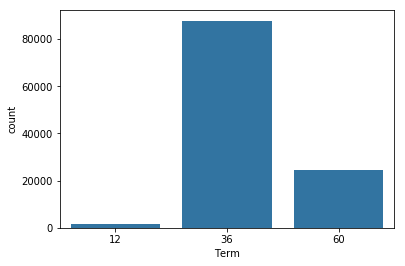

In [9]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x = 'Term',color = base_color)#,order = cat_order)

The most frequent type of loan is the 36 month (3 year) loan. Followed by the 5 year loan and the 1 year loan.
#### LoanStatus

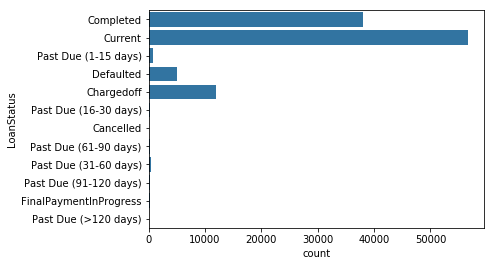

In [10]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, y= 'LoanStatus',color = base_color)#,order = cat_order)
#lt.xticks(rotation=45)

Clearly 'Current' and 'Completed' loans make up most of the loans in the dataset. Defaulted and chargedoff are the next most frequent category.

Could maybe further see how the other variables behave when subsetted by Completed, Defaulted and Chargedoff. What are the differences between loan details of completed and defaulted loans.
#### BorrowerRate

C:\Users\Ashok Anand\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64


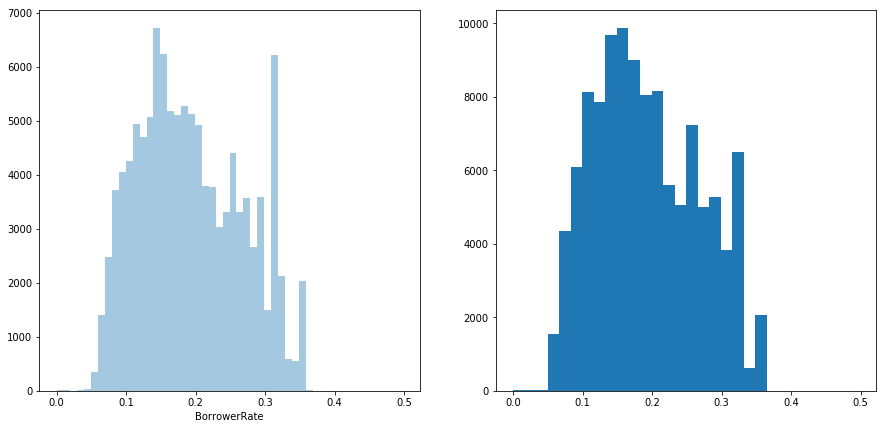

In [11]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
fig, (ax0,ax1) = plt.subplots(1,2, figsize = (15,7))
base_color = sb.color_palette()[0]
p = sb.distplot(  prosper_df.BorrowerRate,color = base_color,ax=ax0, kde=False)
p = ax1.hist(  prosper_df.BorrowerRate,color = base_color, bins = 30)
#lt.xticks(rotation=45)
print(prosper_df.BorrowerRate.describe())

Borrower rate follows a fairly normal distribution with some skew towards the right. It has its median at 0.184 or 18.4%.
<br> p.s. Used two plots, one with seaborn and other with matplotlib to compare differences in plotting.
#### EstimatedReturn

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64
Mode:  0    0.1246
dtype: float64


C:\Users\Ashok Anand\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


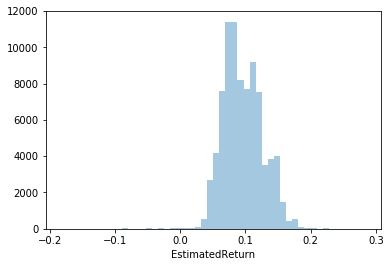

In [12]:
sb.distplot(prosper_df.EstimatedReturn.dropna(),kde = False)
print(prosper_df.EstimatedReturn.dropna().describe())
print('Mode: ',prosper_df.EstimatedReturn.dropna().mode())

The plot above shows that estimated return is centered around 0.8, and it is skewed to the right.
<br>Estimated Return is only for the post 2009 period, and it has both postive and negetaive values. 
<br>Looking at the **mode**, we see that the most frequent estimated return is **0.1246**. However, the describe function says the **mean is 0.096** and the **median is 0.0917**. This shows that there is a **long tail** of small and negative values in the distribution which pulled the median and the mean to the left.
<br>**EstimatedReturn** shows how much return as a 'percentage of the loan amount' is to be expected from each loan listing approximately
#### Proper Rating

(array([ 6935.,     0.,     0.,  9795.,     0.,     0., 14274.,     0.,
            0.,     0., 18345.,     0.,     0., 15581.,     0.,     0.,
        14551.,     0.,     0.,  5372.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
        4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <a list of 20 Patch objects>)

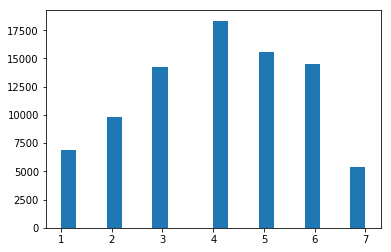

In [13]:
plt.hist(x =prosper_df['ProsperRating (numeric)'].dropna(), bins = 20)

The rating appears to be normally distributed albeit for descrete values. the most frequently assigned rating being 4.
<br>The rating ranges from 1 (lowest) to 7 (highest)

In [14]:
c = prosper_clean_df[prosper_clean_df.ListingCreationDate>'01-01-2009']
c['ProsperRating (numeric)'].isna().sum()

28

In [43]:
c = prosper_clean_df[prosper_clean_df.ListingCreationDate>'01-01-2009']
c['ProsperRating (Alpha)'].isna().sum()

28

We can see that there are 28 Loan listings that have missing values for prosper rating. 
<br>We see that the same is true for the prosperrating alpha.

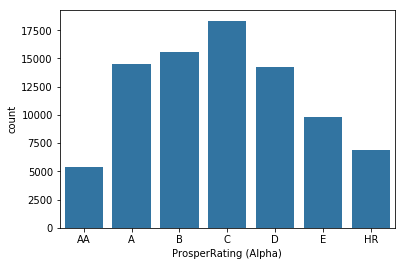

In [32]:
cat_order = ['AA','A','B','C','D','E','HR']
sb.countplot(prosper_clean_df['ProsperRating (Alpha)'],order = cat_order,color = base_color)

We can see that the rating is following a fairly normal distribution with C most frequently given to loans and AA being the least frequent.
<br>ProsperRating is given to every loan at the time of listing. It is shows the creditworthiness of a borrower
#### ProsperScore

(array([  992.,     0.,  5766.,     0.,  7642.,     0., 12595.,     0.,
         9813.,     0., 12278.,     0., 10597.,     0., 12053.,     0.,
         6911.,     0.,  4750.,  1456.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

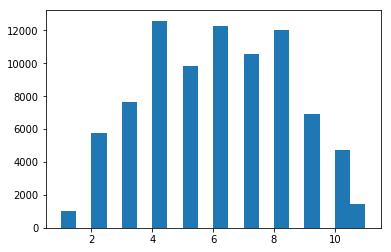

In [35]:
plt.hist(x =prosper_df['ProsperScore'].dropna(), bins = 20)

The Prosper score is given by an inhouse credit risk model by prosper. It looks like it is normally distributed with a little left skew.
#### ListingCategory

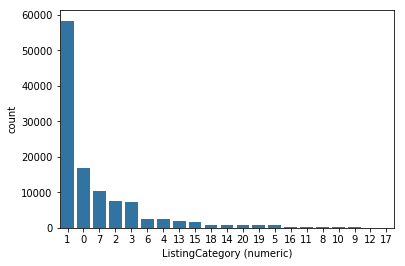

In [55]:
c = prosper_clean_df['ListingCategory (numeric)'].value_counts()
sb.countplot(prosper_clean_df['ListingCategory (numeric)'],order = c.index,color = base_color)

From the above plot we can see that the most common purpose of loan is (1)'Debt Consolidation' closely followed by (0)'Reason not available'.
<br>The **top 5** listing categories are **1.'Debt consolidation', 2.'Not Available', 3.'Other', 4.'Home Improvement', 5. 'Business'**

### Variables left
- BorrowerState: state of the borrower
- Occupation: Selected by borrower at the time of listing.
- EmploymentStatus: Selected by borrower at the time of listing.
- EmploymentStatusDuration: Duration of said employment
- IsBorrowerHomeowner: If borrower has a mortgage on a home has provided documents for possessing a home.

#### BorrowerState

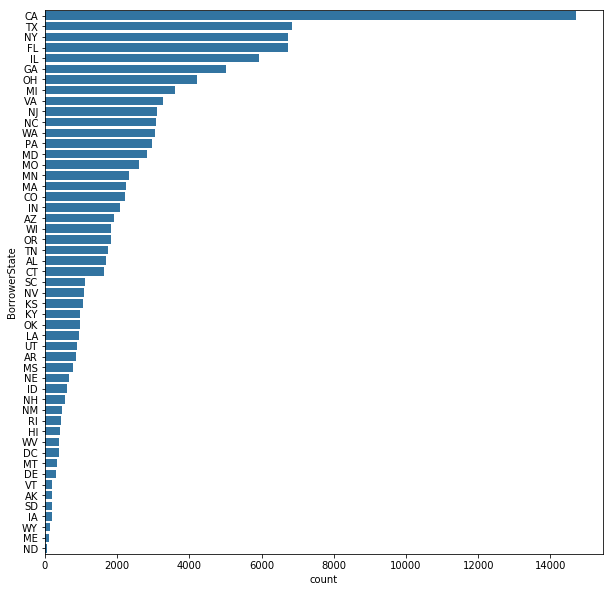

In [58]:
c = prosper_clean_df['BorrowerState'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(y =prosper_clean_df['BorrowerState'],order = c.index,color = base_color)

Looks like the states of CA, TX and NY have the most loan listings in prosper.
#### Occupation

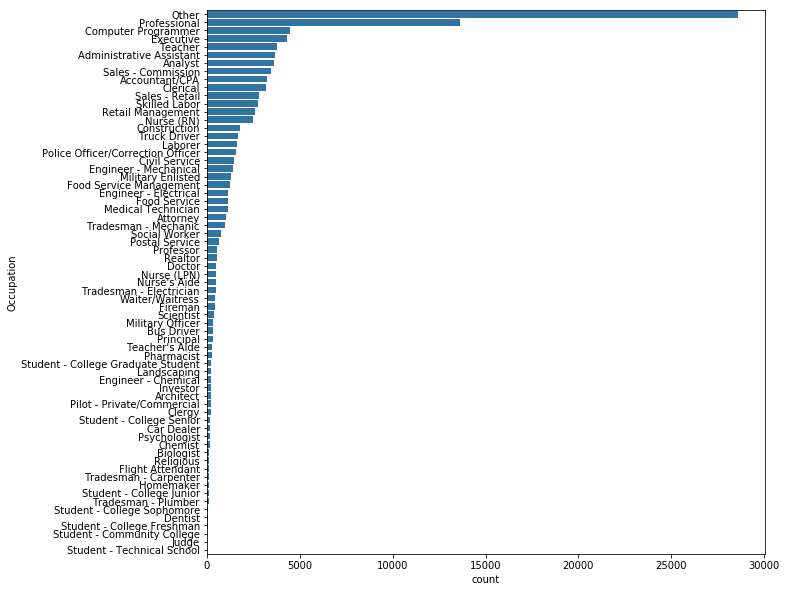

In [59]:
c = prosper_clean_df['Occupation'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(y =prosper_clean_df['Occupation'],order = c.index,color = base_color)

The above plot is quite interesting in that it lists the range of occupations chosen by borrowers. The top occupations are:
1. Other
2. Professional
3. Executive
4. Teacher
5. Administrative Assistant

Possible directions with this variable would be to see how does the rate of default depend upon the occupation chosen. This can be done for the top 10 occupations (removing the 'other' category)
#### EmploymentStatus

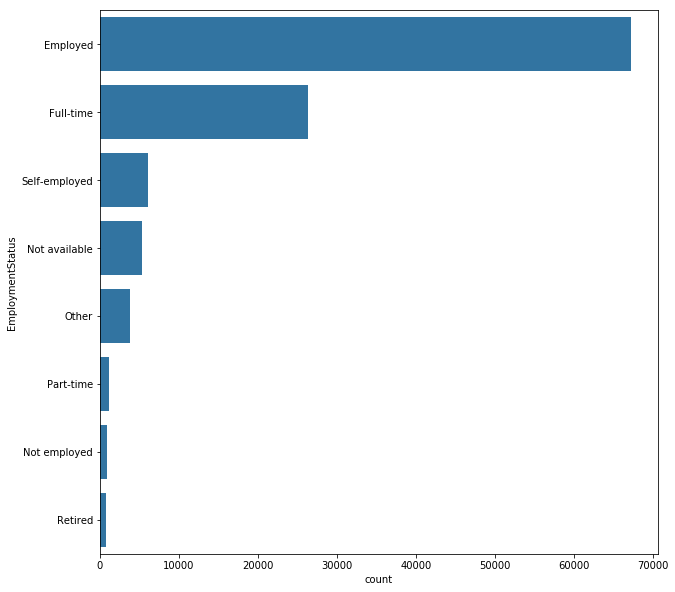

In [60]:
c = prosper_clean_df['EmploymentStatus'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(y =prosper_clean_df['EmploymentStatus'],order = c.index,color = base_color)

Here we see that Employed persons list for loans more than any other category. It would be interesting to see how this variable varies with whether the loan is defaulted or completed.
#### EmploymentStatusDuration

C:\Users\Ashok Anand\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


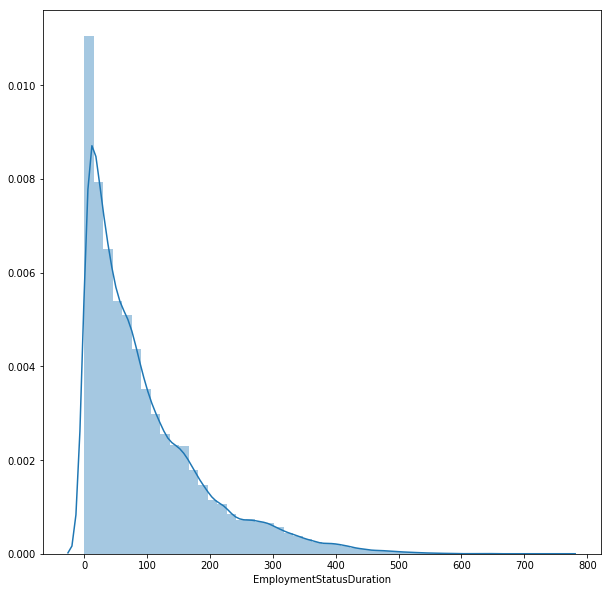

In [63]:
c = prosper_clean_df['EmploymentStatusDuration'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.distplot(prosper_clean_df['EmploymentStatusDuration'].dropna())#,order = c.index,color = base_color)

There is a very long tail to the right of the plot above. We can see that it is unimodal with the mode close to 0. Here I drop all missing values and plot only values where there is data existing.

One direction would be to relate this with type of occupation, and employment status.
<br>My hunch is that this may inversely relate to the probability of default. Common sense tells me that if someone has worked for a long time, the person must be experienced in the use of credit and the importance of credit score, hence less prone to default.
#### IsBorrowerHomeowner

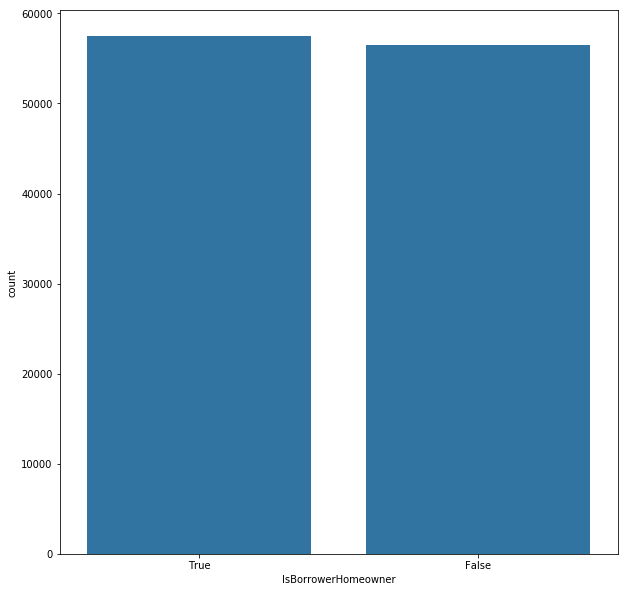

In [73]:
c = prosper_clean_df['IsBorrowerHomeowner'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(x =prosper_clean_df['IsBorrowerHomeowner'],order = c.index,color = base_color)

In [74]:
c/sum(c)*100   #Percentage of total

True     50.447177
False    49.552823
Name: IsBorrowerHomeowner, dtype: float64

Here we see that the data has equal representation from homeowners and those that are not.

Looking at the impact of having a home vs not having a home on the status of loan would be one directiion of further exploration.
# Bivariate Analysis

### Loan Status vs Credit Grade

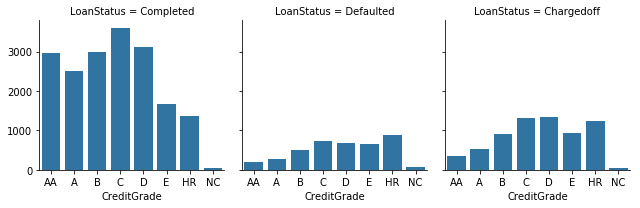

In [118]:
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]



cat_order = ['AA','A','B','C','D','E','HR','NC']
g = sb.FacetGrid(data = c, col = 'LoanStatus')
g.map(sb.countplot, 'CreditGrade', color = base_color, order = cat_order)

- From the univariate plot of Loan status we already know that the most loans are completed followed by Defaulted and Chargedoff.
- The distribution does indeed follow common sense.i.e., The number of default lonas increase as the grade increases. However this might also be spurious if overall there are more loans on the whole that are rated lower than AA.
- We need to keep this in mind that creditgrade is only available for loans that are in the pre-2009 period

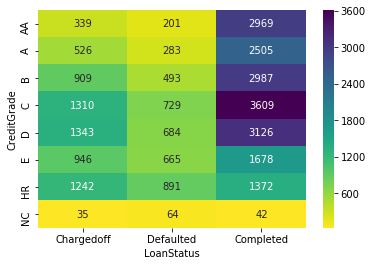

In [129]:
# Only selecting loan status values that we are interested in
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]

# Grouping by columns and ordering the x axis groups in the required order
cat_order = ['AA','A','B','C','D','E','HR','NC']
c = c.groupby(['LoanStatus','CreditGrade']).size().unstack('CreditGrade')[cat_order].T[['Chargedoff','Defaulted','Completed']]

sb.heatmap(c,cmap = 'viridis_r',annot=True,fmt='0.0f')

- Looking at the same variables in the form of a heatmap above, we can draw the same conclusions.
- We may think of showing each as proportions of the total. Divide the number of loans in each credit grade row by the total loans that were given that credit grade

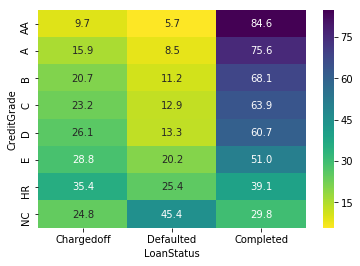

In [174]:
# Only selecting loan status values that we are interested in
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]


# Grouping by columns and ordering the x axis groups in the required order
cat_order = ['AA','A','B','C','D','E','HR','NC']
c = c.groupby(['LoanStatus','CreditGrade']).size().unstack('CreditGrade')[cat_order].T[['Chargedoff','Defaulted','Completed']]

col_sum = c.sum(axis=1)
for col in c.columns:
    c[col] = c[col]/col_sum*100

sb.heatmap(c,cmap = 'viridis_r',annot=True,fmt='0.1f')

- The above heatmap shows that a AA graded loan has the least chance that it would be defaulted or chargedoff, while the chance is highest for default for HR and NC graded loans.
- The chance of the loan being completed reduces as the grade reduces with the highest being 84.6% for AA and 29.8% for a loan that was given NC (not given any grade), 39.1% for HR (lowest Grade)

### Home owning vs loan status

C:\Python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


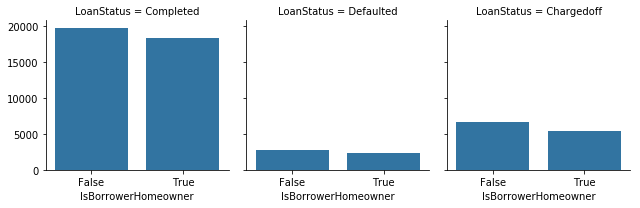

In [131]:
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]



#cat_order = ['AA','A','B','C','D','E','HR','NC']
g = sb.FacetGrid(data = c, col = 'LoanStatus')
g.map(sb.countplot, 'IsBorrowerHomeowner', color = base_color)#, order = cat_order)

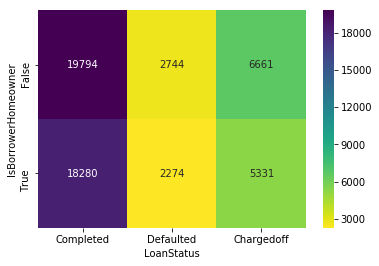

In [165]:
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]
c = c.groupby(['LoanStatus','IsBorrowerHomeowner']).size().unstack('LoanStatus')[['Completed','Defaulted','Chargedoff']]

sb.heatmap(c, cmap = 'viridis_r',annot = True, fmt = '0.0f')

From the above two plots we see that ther are overall less observations of Homeowner borrowers. If we want to see exactly what is the chance of homeowners defaulting in comparison to non homeowners, we need to see this as a ratio to the total.

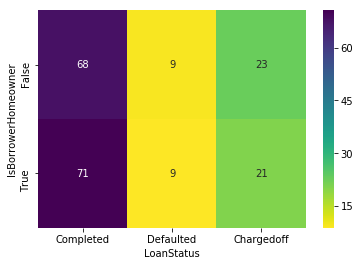

In [164]:
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]
c = c.groupby(['LoanStatus','IsBorrowerHomeowner']).size().unstack('LoanStatus')[['Completed','Defaulted','Chargedoff']]
c['total'] = c.sum(axis=1)
for col in c.columns[:-1]:
    c[col] = c[col]/c.total*100

c.drop('total',axis=1,inplace=True)
sb.heatmap(c, cmap = 'viridis_r',annot = True, fmt = '0.0f')

We see that there is not that big of a difference between the two. Looks like being a homeowner does not affect default rate much.
### Employment status vs Loan status

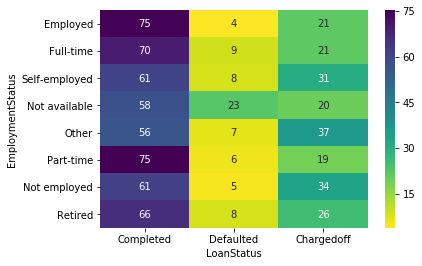

In [187]:
c = prosper_clean_df
loan_stat_ord = ['Completed','Defaulted','Chargedoff']
emp_stat_ord = c.EmploymentStatus.value_counts().index

c = c[c.LoanStatus.isin(loan_stat_ord)]
c = c.groupby(['EmploymentStatus','LoanStatus']).size().unstack('EmploymentStatus')[emp_stat_ord].T[loan_stat_ord]

c['total'] = c.sum(axis=1)
for col in c.columns[:-1]:
    c[col] = c[col]/c.total*100

c.drop('total',axis=1,inplace=True)


sb.heatmap(c, cmap = 'viridis_r',annot = True, fmt = '0.0f')

- **Part-time** and **Employed** occupations have the highest chance that the loan would be completed.
- There is 23% chance that the loan would be defaulted if the borrower does not have any occupation.
- Other, Self-employed, Not employed and Retired occupation categories have the highest chance of being chargedoff.
- Employed, Full-time and Part-time have the lowest chance of default and being chargedoff.

### Loan status vs employment status duration

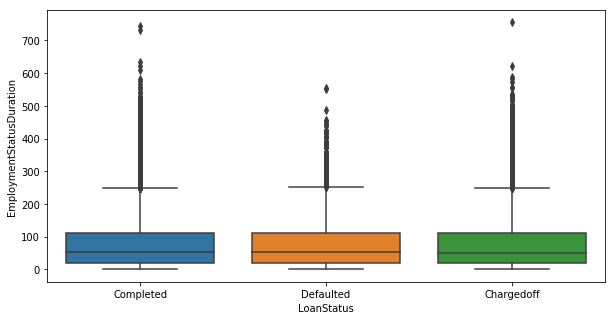

In [196]:
c = prosper_clean_df
loan_stat_ord = ['Completed','Defaulted','Chargedoff']

c = c[c.LoanStatus.isin(loan_stat_ord)]

# g = sb.FacetGrid(data = c, col = 'LoanStatus')
# g.map(sb.distplot, 'EmploymentStatusDuration',kde=False)

fig,ax = plt.subplots(figsize = (10,5))

sb.boxplot(data = c, x = 'LoanStatus',y = 'EmploymentStatusDuration',ax = ax)



Clearly Employment status duration does not have a noticeable impact on the status of loan.
### Employment status vs Duration of employment

In [216]:
c.groupby('EmploymentStatus').mean().EmploymentStatusDuration.sort_values(ascending=False).index

Index(['Employed', 'Other', 'Retired', 'Self-employed', 'Full-time',
       'Part-time', 'Not employed', 'Not available'],
      dtype='object', name='EmploymentStatus')

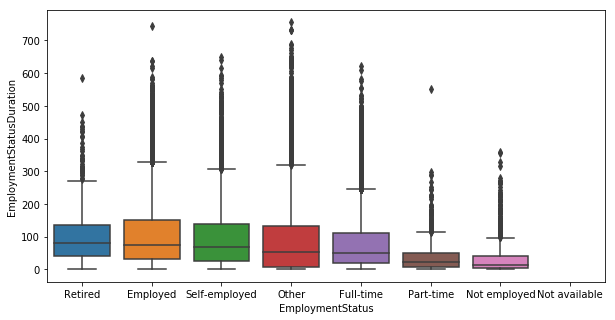

In [218]:
c = prosper_clean_df
stat_order = c.EmploymentStatus.value_counts()[:10].index

c = c[c.EmploymentStatus.isin(stat_order)]

mean_order = c.groupby('EmploymentStatus').median().EmploymentStatusDuration.sort_values(ascending=False).index

fig,ax = plt.subplots(figsize = (10,5))


sb.boxplot(data = c, x = 'EmploymentStatus',y = 'EmploymentStatusDuration',ax = ax, order = mean_order)
# ax.set(yscale='log')

Not surprisingly the median employment duration is the highest for retired, Employed and Self-employed.
>Here I am using only the top 10 employment status categories.
### Loan Status vs Borrower Rate

LoanStatus
Chargedoff    0.2400
Completed     0.1744
Defaulted     0.2296
Name: BorrowerRate, dtype: float64

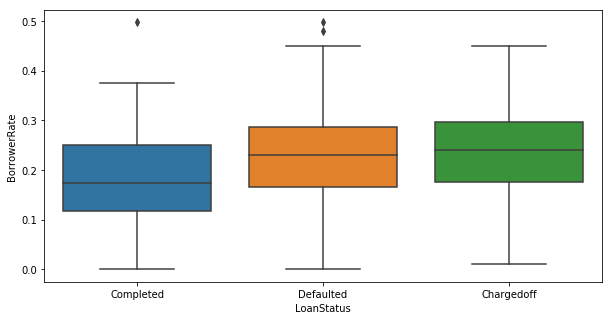

In [220]:
c = prosper_clean_df
loan_stat_ord = ['Completed','Defaulted','Chargedoff']

c = c[c.LoanStatus.isin(loan_stat_ord)]

# g = sb.FacetGrid(data = c, col = 'LoanStatus')
# g.map(sb.distplot, 'EmploymentStatusDuration',kde=False)

fig,ax = plt.subplots(figsize = (10,5))

sb.boxplot(data = c, x = 'LoanStatus',y = 'BorrowerRate',ax = ax)

c.groupby('LoanStatus').median().BorrowerRate


We can see from the medians that clearly the borrower rates were higher for defaulted and chargedoff than completed. This tells that the method of assigning borrower rates takes into account risk of default properly. Since borrower rates are given for each loan before the actual disbursement of loans, it only makes sense that defaulted and charged off loans should have higher borrower rates than completed ones. If their credit risk process was robust, they would judge these loans ahead of time as risky. We could see the same trend when we compared with credit grades.

### Loan Status vs Borrower State

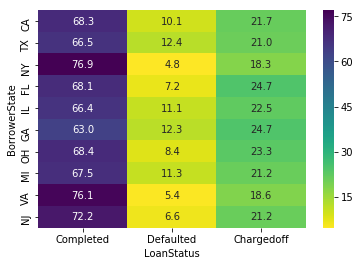

In [229]:
c = prosper_clean_df
state_ord = c.BorrowerState.value_counts().index[:10]  # Taking only the top 10 states by number of loans borrowed

c = c[c.BorrowerState.isin(state_ord)]
loan_stat_ord = ['Completed','Defaulted','Chargedoff']

c = c[c.LoanStatus.isin(loan_stat_ord)]

# Creating matrix data for plotting heatmap
c = c.groupby(['LoanStatus','BorrowerState']).size().unstack('LoanStatus')[loan_stat_ord].T[state_ord].T

# Calculating percentages for each loan status
col_sum = c.sum(axis=1)
for col in c.columns:
    c[col] = c[col]/col_sum*100


sb.heatmap(c, cmap = 'viridis_r', annot = True, fmt = '0.1f')


One pattern jumps out that there is a higher chance that the loan is completed without default or being chargedoff, if the borrower is from NY than from the other states.

# References
- APR explanation: https://www.investopedia.com/terms/a/apr.asp
- Default vs Charge-Off: https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-
- Credit rating https://www.investopedia.com/terms/c/creditrating.asp

